In [138]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
# loading the loan 2007-2015 data
df = pd.read_csv('Loan_0715_after_eda.csv')
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,10.0,RENT,24000.0,...,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,INDIVIDUAL,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,0.0,RENT,30000.0,...,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,INDIVIDUAL,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,10.0,RENT,12252.0,...,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,INDIVIDUAL,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,10.0,RENT,49200.0,...,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,0.0,INDIVIDUAL,0.0
4,1075358,3000.0,3000.0,3000.0,60,12.69,67.79,1.0,RENT,80000.0,...,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Jan-2016,0.0,INDIVIDUAL,0.0


In [140]:
df['home_ownership'].value_counts()

MORTGAGE    414522
RENT        333724
OWN          77014
OTHER          179
NONE            43
Name: home_ownership, dtype: int64

In [141]:
df['term'].value_counts()

36    573166
60    252316
Name: term, dtype: int64

In [142]:
#combining mortgage and own categories
df['home_ownership'] = df['home_ownership'].str.replace('MORTGAGE', 'OWN')

In [143]:
df['home_ownership'].value_counts()

OWN      491536
RENT     333724
OTHER       179
NONE         43
Name: home_ownership, dtype: int64

In [144]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq'],
      dtype='object')

In [145]:
# Columns to drop - pymnt_plan, installment, verification_status, issue_d, issue_d, earliest_cr_line, 
# pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp,
# out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries,
# collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, 


# Columns to use - loan_amnt, funded_amnt, int_rate, annual_inc, zip_code, addr_state, dti, delinq_2yrs, 
# inq_last_6mths, open_acc, collections_12_mths_ex_med, acc_now_delinq
# and the one-hot encoded columns

df = df[['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 
       'inq_last_6mths', 'open_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 
       'term', 'emp_length', 'home_ownership', 'application_type', 'purpose', 'loan_status']]


In [146]:
# Combining loan status values to 'good' or 'bad'

df['loan_status'].value_counts()
#df['loan_status'] = df['loan_status'].str.replace('Current', 'good')
#df['loan_status'] = df['loan_status'].replace({'loan_status':{'Current' : 'good', 'Fully Paid' : 'good' }}) 

df['loan_status']= df['loan_status'].replace(dict.fromkeys(['Current','Fully Paid','In Grace Period','Issued'], 'good'))
df['loan_status']= df['loan_status'].replace(dict.fromkeys(['Charged Off','Late (31-120 days)','Late (16-30 days)','Default'], 'bad'))
df['loan_status'].value_counts()

good    768526
bad      56956
Name: loan_status, dtype: int64

# Any outliers?

In [150]:
df['annual_inc'].max()

9500000.0

In [151]:
# removing extereme values in the annual income column
inc_mean = df['annual_inc'].mean()
inc_std = df['annual_inc'].std()
Three_std = 3*inc_std
Three_std



196071.44670046447

In [152]:
# 99.7 Quantile
quantile_997 = df['annual_inc'].quantile(0.997)
quantile_997


379557.0000000298

In [154]:
# Removing the data that is above the 99.7 quantile. 
# I prefer the 99.7 quantile treshold than the 3 standard deviation because it removes less data.

df = df[df['annual_inc'] <= quantile_997]
print(df['annual_inc'].max())



379000.0


array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>],
       [<AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'delinq_2yrs'}>],
       [<AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'collections_12_mths_ex_med'}>],
       [<AxesSubplot:title={'center':'acc_now_delinq'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

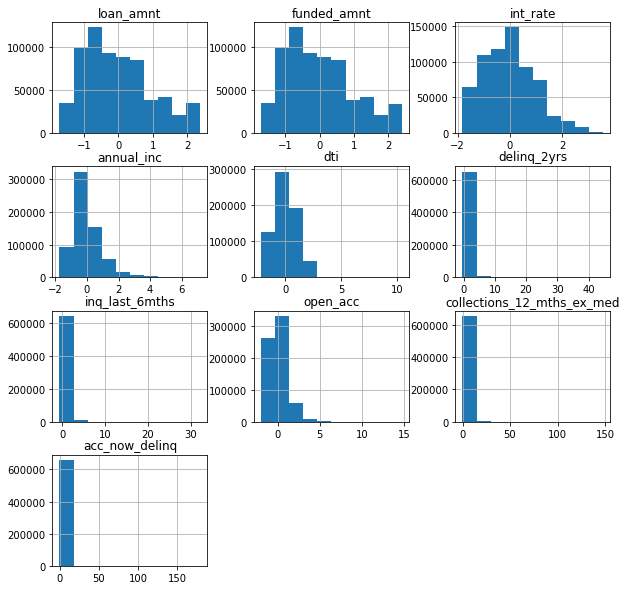

In [155]:
X_train[['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq']].hist(figsize=(10,10),bins=10)

# One-hot-encoding Categorical Columns

In [156]:
# df = pd.get_dummies(df, prefix=['term', 'emp', 'home', 'appl', 'purpose'], columns=['term', 'emp_length', 'home_ownership', 'application_type', 'purpose'])
cat_cols = ['term', 'emp_length', 'home_ownership', 'application_type', 'purpose']
df = pd.get_dummies(df, prefix=['term', 'emp', 'home', 'appl', 'purpose'], columns=cat_cols)

In [157]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'loan_status',
       'term_36', 'term_60', 'emp_0.0', 'emp_1.0', 'emp_2.0', 'emp_3.0',
       'emp_4.0', 'emp_5.0', 'emp_6.0', 'emp_7.0', 'emp_8.0', 'emp_9.0',
       'emp_10.0', 'home_NONE', 'home_OTHER', 'home_OWN', 'home_RENT',
       'appl_INDIVIDUAL', 'appl_JOINT', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [158]:
X = df[['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 
       'term_36', 'term_60', 'emp_0.0', 'emp_1.0', 'emp_2.0', 'emp_3.0',
       'emp_4.0', 'emp_5.0', 'emp_6.0', 'emp_7.0', 'emp_8.0', 'emp_9.0',
       'emp_10.0', 'home_NONE', 'home_OTHER', 'home_OWN', 'home_RENT',
       'appl_INDIVIDUAL', 'appl_JOINT', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding']]
y = df[['loan_status']]


In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


# Any outliers?

# Standardize the numeric columns using StandardScaler

In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
to_standardize = ['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq']
scaler.fit(X_train[to_standardize])
standardized_cols_train = scaler.transform(X_train[to_standardize])
standardized_cols_train = pd.DataFrame(standardized_cols_train)
standardized_cols_train.columns = to_standardize


In [161]:
standardized_cols_train.describe().T

# The following columns don't seem right
# collections_12_mths_ex_med
# acc_now_delinq

# annual_inc column - I may need to remove extereme values. 
# Should I remove extereme values from X_train only, and not from X_test??

,count,mean,std,min,25%,50%,75%,max
loan_amnt,658404.0,-1.473256e-16,1.000001,-1.707768,-0.778188,-0.199056,0.608758,2.390701
funded_amnt,658404.0,-7.313145e-16,1.000001,-1.707269,-0.780024,-0.203467,0.610845,2.394009
int_rate,658404.0,7.276851e-16,1.000001,-1.810561,-0.745473,-0.061262,0.670843,3.587862
annual_inc,658404.0,-6.000994e-17,1.000001,-1.736304,-0.662009,-0.228770,0.368473,7.272592
dti,658404.0,-1.310494e-16,1.000001,-2.190530,-0.746666,-0.058072,0.697199,43.941606
delinq_2yrs,658404.0,5.677682e-15,1.000001,-0.365773,-0.365773,-0.365773,-0.365773,44.821761
inq_last_6mths,658404.0,-6.840983e-16,1.000001,-0.696905,-0.696905,-0.696905,0.304328,32.343777
open_acc,658404.0,9.238274e-16,1.000001,-1.994955,-0.678105,-0.113740,0.450624,14.747857
collections_12_mths_ex_med,658404.0,1.039170e-14,1.000001,-0.106433,-0.106433,-0.106433,-0.106433,149.086322
acc_now_delinq,658404.0,-4.205592e-15,1.000001,-0.064991,-0.064991,-0.064991,-0.064991,79.372754


In [162]:
not_to_standardize = ['term_36', 'term_60', 'emp_0.0', 'emp_1.0', 'emp_2.0', 'emp_3.0',
       'emp_4.0', 'emp_5.0', 'emp_6.0', 'emp_7.0', 'emp_8.0', 'emp_9.0',
       'emp_10.0', 'home_NONE', 'home_OTHER', 'home_OWN', 'home_RENT',
       'appl_INDIVIDUAL', 'appl_JOINT', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding']

X_train = X_train[not_to_standardize]

# Combining the standardized columns and the categorical columns that don't need standardization.

X_train.reset_index(drop=True, inplace=True)
standardized_cols_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([standardized_cols_train, X_train], axis=1) 


In [163]:
X_train.head()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,collections_12_mths_ex_med,acc_now_delinq,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,-0.448528,-0.447166,-0.809332,-1.017129,0.510503,-0.365773,0.304328,-0.678105,-0.106433,-0.064991,...,0,0,0,0,0,0,0,0,0,0
1,-1.113787,-1.112881,0.315054,-0.730453,-1.390404,0.792882,0.304328,-0.866226,-0.106433,-0.064991,...,0,0,0,0,0,1,0,0,0,0
2,1.796720,1.799621,-0.289332,1.682406,-0.494505,-0.365773,-0.696905,-1.054348,-0.106433,-0.064991,...,0,0,0,0,0,0,0,0,0,0
3,-0.341612,-0.340176,0.983300,-0.443777,-0.072620,-0.365773,0.304328,-0.113740,-0.106433,-0.064991,...,0,0,0,0,0,0,0,0,0,0
4,-1.054389,-1.053442,0.670843,-0.587115,0.402607,-0.365773,-0.696905,-0.489983,-0.106433,-0.064991,...,0,0,0,0,0,0,0,0,0,0


In [164]:
# Standardizing the test data

standardized_cols_test = scaler.transform(X_test[to_standardize])
standardized_cols_test = pd.DataFrame(standardized_cols_test)
standardized_cols_test.columns = to_standardize

X_test = X_test[not_to_standardize]
X_test

,term_36,term_60,emp_0.0,emp_1.0,emp_2.0,emp_3.0,emp_4.0,emp_5.0,emp_6.0,emp_7.0,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
2087,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
717647,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241637,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
205240,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19124,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178228,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87674,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473811,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201485,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [165]:
# Combining the standardized columns and the categorical columns that don't need standardization.

X_test.reset_index(drop=True, inplace=True)
standardized_cols_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([standardized_cols_test, X_test], axis=1)


In [166]:
X_test.head()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,collections_12_mths_ex_med,acc_now_delinq,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.608758,0.610845,-0.129683,-0.348218,-0.061709,-0.365773,0.304328,-0.866226,-0.106433,-0.064991,...,0,0,0,0,0,0,0,0,0,0
1,0.014777,0.016456,1.049440,-0.652381,1.317903,-0.365773,-0.696905,0.074381,-0.106433,-0.064991,...,0,0,0,0,0,0,0,0,0,0
2,-0.104019,-0.102421,0.394878,-0.945460,-0.357513,-0.365773,-0.696905,-0.866226,-0.106433,-0.064991,...,0,0,0,0,0,0,0,0,0,0
3,-1.054389,-1.053442,-0.259683,-0.037652,-0.989128,-0.365773,0.304328,0.826867,-0.106433,-0.064991,...,0,0,0,0,0,0,0,0,0,0
4,1.202739,1.205233,1.054001,0.308748,0.567481,-0.365773,1.305561,0.638746,-0.106433,-0.064991,...,0,0,0,0,0,0,0,0,0,0


In [167]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)